In [7]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

from scipy.stats import beta
import numpy as np


In [8]:
%matplotlib ipympl

from re import X


def plot_slider_animation(alpha_estimates_list, 
                        beta_estimates_list, 
                        min_u1s_list, 
                        min_u2s_list, 
                        min_u3s_list, 
                        current_u1s_list,
                        first_frame, last_frame,
                        y_min=0, y_max=100, x_min=0, x_max=0.3):
    
    framed_time=slice(first_frame, last_frame)
    
    frame_data_list = list(zip(alpha_estimates_list[framed_time], beta_estimates_list[framed_time],
                min_u1s_list[framed_time], min_u2s_list[framed_time], min_u3s_list[framed_time],
                current_u1s_list[framed_time], 
                range(first_frame, last_frame)))
    
    
    
    a_process, b_process, min_u1, min_u2, min_u3, current_u1, start_time = frame_data_list.pop(0)
    end_time = frame_data_list[-1][-1]
    
    fig, ax = plt.subplots(figsize=(15,7))
    
    if (a_process is not None) and (b_process is not None):
        x_process = np.linspace(beta.ppf(0.001, a_process, b_process),beta.ppf(0.999, a_process, b_process), 1000)
        y_process = beta.pdf(x_process, a_process, b_process)
        line_process = ax.plot(x_process, y_process, 'b-', label='distance do reference distribution')[0]
    else:
        line_process = ax.plot([], [], 'b-', label='distance to reference distribution')[0]
    
    if current_u1 is not None:    
        u1_process = ax.axvline(current_u1, ymin=0, ymax= beta.pdf(current_u1, a_process, b_process), color="blue", linestyle="dashdot", label='current u1')
    else:
        u1_process = ax.axvline(0, ymin=0, ymax= 0, color="blue", linestyle="dashdot")
        
    if min_u1 is not None:    
        u1_marker = ax.plot([min_u1], [0], marker='^', markersize=y_max*0.05, color="green", alpha=0.5, label="u1_threshold")
        u2_marker = ax.plot([min_u2], [0], marker='^', markersize=y_max*0.05, color="orange", alpha=0.5, label="u2_threshold")
        u3_marker = ax.plot([min_u3], [0], marker='^', markersize=y_max*0.05, color="red", alpha=0.5, label="u3_threshold")
    else:
        u1_marker = ax.plot([], [], marker='^', markersize=y_max*0.05, color="green", alpha=0.5, label="u1_threshold")
        u2_marker = ax.plot([], [], marker='^', markersize=y_max*0.05, color="orange", alpha=0.5, label="u2_threshold")
        u3_marker = ax.plot([], [], marker='^', markersize=y_max*0.05, color="red", alpha=0.5, label="u3_threshold")
    
    ax.set(xlim=(x_min, x_max), xlabel='Values of Random Variable X (0, 1)',
        ylim=(y_min,y_max), ylabel='Probability density', title='Beta Distribution of pdf distances to reference distribution')
    time_legend = ax.text(0.9, 0.95, f'time: {start_time}', ha='left', va='top', transform=ax.transAxes,
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.legend(loc='lower right')

    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)

    # Make a horizontal slider to control the frequency.
    axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
    freq_slider = Slider(
        ax=axfreq,
        label='Time step',
        valmin=start_time,
        valmax=end_time,
        valinit=start_time,
    )
        
    # Plot the beta distribution
    def update(val):
        
        idx = int(freq_slider.val-start_time)
        a_process, b_process, min_u1, min_u2, min_u3, current_u1, time = frame_data_list[idx]

        if (a_process is not None) and (b_process is not None):
            x_process = np.linspace(beta.ppf(0.001, a_process, b_process),beta.ppf(0.999, a_process, b_process), 1000)
            y_process = beta.pdf(x_process, a_process, b_process)
            line_process.set_data(x_process, y_process)
        else:
            line_process.set_data([], [])
            
        if current_u1 is not None:    
            u1_process.set_xdata([current_u1, current_u1])
            u1_process.set_ydata([0,beta.pdf(current_u1, a_process, b_process)])
        else:
            u1_process.set_xdata([0,0])
            u1_process.set_ydata([0,0])
            
        if min_u1 is not None:    
            u1_marker[0].set_xdata([min_u1])
            u1_marker[0].set_ydata([0])
            u2_marker[0].set_xdata([min_u2])
            u2_marker[0].set_ydata([0])
            u3_marker[0].set_xdata([min_u3])
            u3_marker[0].set_ydata([0])
        else:
            u1_marker[0].set_xdata([])
            u1_marker[0].set_ydata([])
            u2_marker[0].set_xdata([])
            u2_marker[0].set_ydata([])
            u3_marker[0].set_xdata([])
            u3_marker[0].set_ydata([])
        
        time_legend.set_text(f'time: {time}')
        
        fig.canvas.draw_idle()
        
    # register the update function with each slider
    freq_slider.on_changed(update)
    # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
    resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', hovercolor='0.975')
    
    def reset(event):
        freq_slider.reset()
    
    button.on_clicked(reset)

    plt.show()

In [9]:
from random import gauss

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def gaussian_histogram(mu:float, sigma:float, sample_size:int):
    bin_edges = np.linspace(-10,10,21)
    histogram, _ = np.histogram([gauss(mu, sigma) for _ in range(sample_size)], bins=bin_edges, density=True)
    return pd.Series(histogram)

In [11]:
gaussian_histogram(0, 1, 10000)

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
5     0.0000
6     0.0011
7     0.0232
8     0.1285
9     0.3420
10    0.3412
11    0.1401
12    0.0224
13    0.0015
14    0.0000
15    0.0000
16    0.0000
17    0.0000
18    0.0000
19    0.0000
dtype: float64

In [12]:
from src.change_detector import detect_response
from src.change_detector.corrected_change_detector import PDFChangeDetector


change_detector = PDFChangeDetector()

for i in range(500):
    new_pdf = gaussian_histogram(0, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    print("Status:", detect_response.state.name, "| Alpha:", detect_response.alpha_estimate,"| Beta:", detect_response.beta_estimate,"\n***\n")

current process run_order: 1 

Status: LEARNING | Alpha: None | Beta: None 
***

current process run_order: 2 

Status: LEARNING | Alpha: None | Beta: None 
***

current process run_order: 3 

Status: LEARNING | Alpha: 8.174433624085372 | Beta: 1008.9341257609007 
***

current process run_order: 4 

Status: LEARNING | Alpha: 10.792122358984622 | Beta: 1342.7167983656293 
***

current process run_order: 5 

Status: LEARNING | Alpha: 13.425762150541887 | Beta: 1668.246789932027 
***

current process run_order: 6 

Status: LEARNING | Alpha: 11.800143438098456 | Beta: 1357.0555582010543 
***

current process run_order: 7 

Status: LEARNING | Alpha: 9.406033023846495 | Beta: 988.8015684526525 
***

current process run_order: 8 

Status: LEARNING | Alpha: 10.370072512826814 | Beta: 1065.5195327441588 
***

current process run_order: 9 

Status: LEARNING | Alpha: 10.768209461699797 | Beta: 1070.6592546260854 
***

current process run_order: 10 

Status: LEARNING | Alpha: 11.823360463596892 | 

In [13]:
from src.change_detector.corrected_change_detector import PDFChangeDetector


change_detector_window = PDFChangeDetector(method="window")

for i in range(200):
    new_pdf = gaussian_histogram(0, 1, 10000)
    detect_response = change_detector_window.detect_change(new_pdf)
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate,
        "| Beta :", detect_response.beta_estimate,
        "\n***\n")

current process run_order: 1 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 2 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 3 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 4 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 5 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 6 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 7 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 8 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 9 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 10 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 11 

Status:  LEARNING | Alpha : None | Beta : None 
***

current process run_order: 12 

Status:  LEARNING | Alpha : None | Beta : 

In [14]:
change_detector.current_process.__dict__

{'_monitor_method': <MonitorMethod.TRUNCATED: 0>,
 '_monitor_size': 100,
 'reference_PDF': 0     0.000000
 1     0.000000
 2     0.000000
 3     0.000000
 4     0.000000
 5     0.000020
 6     0.001355
 7     0.021835
 8     0.135175
 9     0.340955
 10    0.341780
 11    0.135460
 12    0.022115
 13    0.001275
 14    0.000030
 15    0.000000
 16    0.000000
 17    0.000000
 18    0.000000
 19    0.000000
 dtype: float64,
 'alpha_fading_pdf': 0     0.0000
 1     0.0000
 2     0.0000
 3     0.0000
 4     0.0000
 5     0.0001
 6     0.0019
 7     0.0200
 8     0.1386
 9     0.3402
 10    0.3386
 11    0.1378
 12    0.0213
 13    0.0015
 14    0.0000
 15    0.0000
 16    0.0000
 17    0.0000
 18    0.0000
 19    0.0000
 dtype: float64,
 'estimated_alpha': 18.354730287780846,
 'estimated_beta': 1413.870735516928,
 'run_order': 500,
 'dist_geo_mean': 0.012470777892984881,
 'complementary_dist_geo_mean': 0.9871799931438221,
 'min_u1': 0.013725063800358537,
 'min_u2': 0.017136895269170213,
 

In [15]:
from src.change_detector.corrected_change_detector import PDFChangeDetector

change_detector = PDFChangeDetector(reference_size=30)

detection_status_list = []
alpha_estimates_list = []
beta_estimates_list = []
u1_min_list = []
u2_min_list = []
u3_min_list = []
current_u1_list = []

for i in range(300):
    new_pdf = gaussian_histogram(2, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")


for i in range(100):
    new_pdf = gaussian_histogram(2.1, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")

current process run_order: 1 

Status:  LEARNING | Alpha : None | Beta None 
***

current process run_order: 2 

Status:  LEARNING | Alpha : None | Beta None 
***

current process run_order: 3 

Status:  LEARNING | Alpha : 451.17807498448695 | Beta 47364.75220583469 
***

current process run_order: 4 

Status:  LEARNING | Alpha : 141.60749240223055 | Beta 15482.00926080166 
***

current process run_order: 5 

Status:  LEARNING | Alpha : 83.95775161279593 | Beta 8799.751707604168 
***

current process run_order: 6 

Status:  LEARNING | Alpha : 24.821097510629137 | Beta 2376.732208197083 
***

current process run_order: 7 

Status:  LEARNING | Alpha : 24.60035331512501 | Beta 2275.6077805382847 
***

current process run_order: 8 

Status:  LEARNING | Alpha : 24.867546861771142 | Beta 2237.420551378111 
***

current process run_order: 9 

Status:  LEARNING | Alpha : 27.487764670749005 | Beta 2494.3100959876588 
***

current process run_order: 10 

Status:  LEARNING | Alpha : 26.4209831593

In [16]:
data = pd.DataFrame([detection_status_list, alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list]).T

In [17]:
data

,0,1,2,3,4,5,6
0,LEARNING,None,None,None,None,None,None
1,LEARNING,None,None,None,None,None,None
2,LEARNING,451.178075,47364.752206,None,None,None,None
3,LEARNING,141.607492,15482.009261,None,None,None,None
4,LEARNING,83.957752,8799.751708,None,None,None,None
...,...,...,...,...,...,...,...
395,IN_CONTROL,22.272617,1810.9024,0.01307,0.014815,0.016788,0.014674
396,IN_CONTROL,22.506113,1829.644553,0.01307,0.014815,0.016788,0.014663
397,IN_CONTROL,22.710385,1844.741853,0.01307,0.014815,0.016788,0.014664
398,IN_CONTROL,22.836062,1857.586883,0.01307,0.014815,0.016788,0.014637


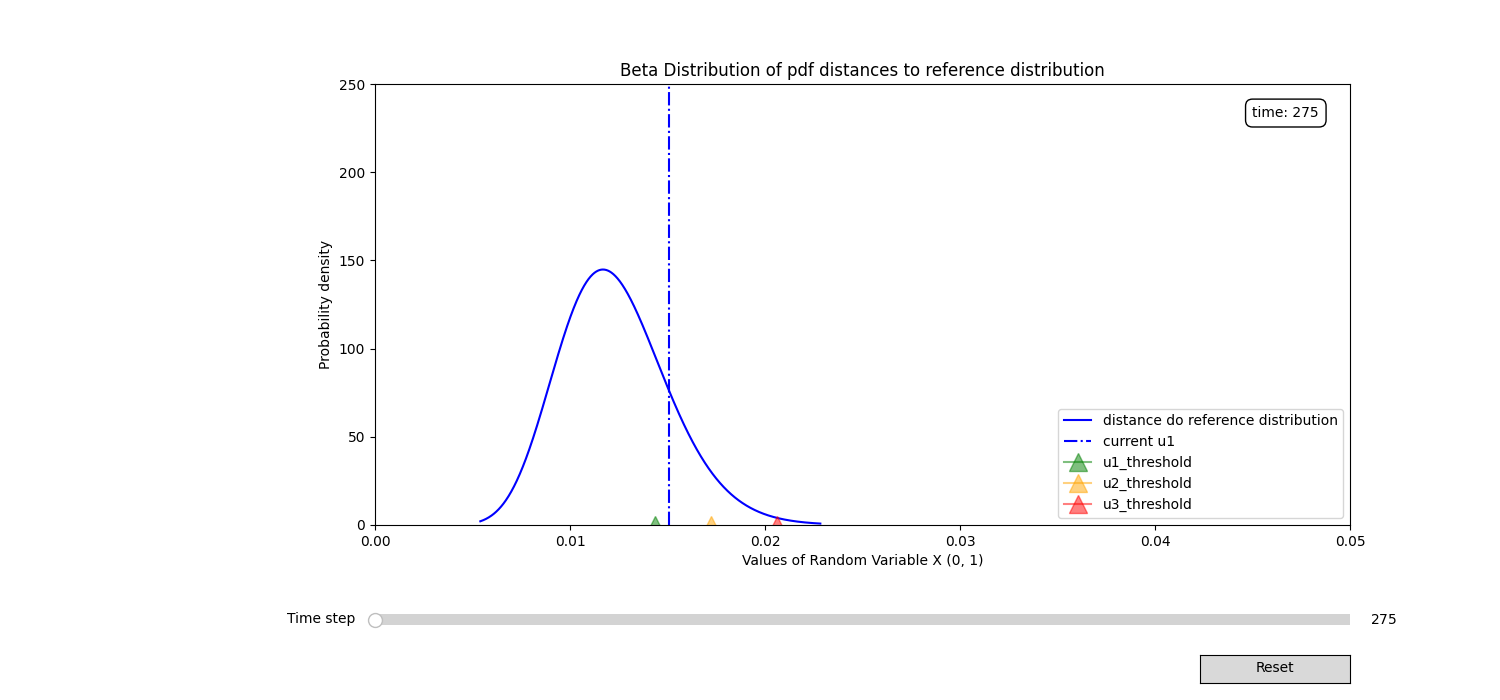

In [18]:
plot_slider_animation(alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list, first_frame=275, last_frame=350, y_max=250, x_max=0.05)

In [ ]:
change_detector = PDFChangeDetector(reference_size=30)

detection_status_list = []
alpha_estimates_list = []
beta_estimates_list = []
u1_min_list = []
u2_min_list = []
u3_min_list = []
current_u1_list = []

for i in range(500):
    new_pdf = gaussian_histogram(2, 1, 1000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")


for i in range(50):
    new_pdf = gaussian_histogram(2, 1.2, 1000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")

In [ ]:
data = pd.DataFrame([detection_status_list, alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list]).T

In [ ]:
data

In [ ]:
plot_slider_animation(alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list, first_frame=0, last_frame=549)